# Exploratory Data Analysis of Jumpman23 


This project contains two main parts:
- Data integraty check
- Market growth analysis

A tableau analysis is also attached for data visualization and market growth model.

In [327]:
# load libraries here
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns; sns.set(color_codes = True)
import matplotlib.pyplot as plt
import time
import datetime as dt
import warnings 
from __future__ import division

import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

## Part I. Load Data and check dataframe integrity

In [243]:
## Load Data here
df = pd.read_csv("dataset/analyze_me.csv") 

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   delivery_id                          5983 non-null   int64  
 1   customer_id                          5983 non-null   int64  
 2   jumpman_id                           5983 non-null   int64  
 3   vehicle_type                         5983 non-null   object 
 4   pickup_place                         5983 non-null   object 
 5   place_category                       5100 non-null   object 
 6   item_name                            4753 non-null   object 
 7   item_quantity                        4753 non-null   float64
 8   item_category_name                   4753 non-null   object 
 9   how_long_it_took_to_order            3038 non-null   object 
 10  pickup_lat                           5983 non-null   float64
 11  pickup_lon                    

In [245]:
df.describe(include = 'all')

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
count,5.983000e+03,5983.000000,5983.000000,5983,5983,5100,4753,4753.000000,4753,3038,5983.000000,5983.000000,5983.000000,5983.000000,5983,5433,5433,5983
unique,NaN,NaN,NaN,7,898,57,2277,NaN,767,2579,NaN,NaN,NaN,NaN,5214,4719,4717,5214
top,NaN,NaN,NaN,bicycle,Shake Shack,Italian,Fries,NaN,Sides,00:03:20.15586,NaN,NaN,NaN,NaN,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
freq,NaN,NaN,NaN,4274,311,504,76,NaN,193,5,NaN,NaN,NaN,NaN,5,5,5,5
mean,1.379495e+06,176472.595521,102661.602541,NaN,NaN,NaN,NaN,1.248264,NaN,NaN,40.741425,-73.987101,40.744216,-73.985765,NaN,NaN,NaN,NaN
std,6.459397e+04,116414.487842,48607.211795,NaN,NaN,NaN,NaN,0.785904,NaN,NaN,0.022833,0.014896,0.025251,0.018060,NaN,NaN,NaN,NaN
min,1.271706e+06,242.000000,3296.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,40.665611,-74.015837,40.649356,-74.017679,NaN,NaN,NaN,NaN
25%,1.322792e+06,77817.000000,60761.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,40.724340,-73.996630,40.725307,-74.000297,NaN,NaN,NaN,NaN
50%,1.375689e+06,131093.000000,113364.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,40.735677,-73.988682,40.740424,-73.989280,NaN,NaN,NaN,NaN
75%,1.436371e+06,293381.000000,143807.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,40.758726,-73.980739,40.763885,-73.974696,NaN,NaN,NaN,NaN


In [246]:
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [247]:
# Check the percentage of null values in each column

columns = df.columns
percentage_missing = df.isnull().sum()*100/len(df)
table_percentage_missing = pd.DataFrame({'column_name': columns, 'percentage_missing': percentage_missing})

table_percentage_missing

,column_name,percentage_missing
delivery_id,delivery_id,0.000000
customer_id,customer_id,0.000000
jumpman_id,jumpman_id,0.000000
vehicle_type,vehicle_type,0.000000
pickup_place,pickup_place,0.000000
place_category,place_category,14.758482
item_name,item_name,20.558248
item_quantity,item_quantity,20.558248
item_category_name,item_category_name,20.558248
how_long_it_took_to_order,how_long_it_took_to_order,49.222798


### Integrity issue 1: Null values in lots of columns. ### 
<p>In "how_long_it_took_to_order" column the null rate is upto 50%. It may cause some diffidulty calculating the delivery time in further analysis.</p>

In [248]:
#Check duplicate records
df.delivery_id.nunique()

5214

In [249]:
df.delivery_id.value_counts()

1460296    5
1286826    4
1319971    4
1475127    4
1343610    4
          ..
1399676    1
1432665    1
1363103    1
1356960    1
1327104    1
Name: delivery_id, Length: 5214, dtype: int64

In [250]:
df_check_id=df[df["delivery_id"]==1460296]
df_check_id.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
2599,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Bistec,1.0,Tacos,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
3510,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Tortilla,1.0,Soups,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
3796,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Chips & La Esquina's Own Salsa Roja,1.0,Plates,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
4056,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Canned Soda,1.0,Cold Drinks,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
4487,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Elotes Callejeros,1.0,Sides,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842


In [251]:
# check duplicated records and drop duplicates if there are any

duplicated_records = df.duplicated(keep = 'last')
print(duplicated)

0       False
1       False
2       False
3       False
4       False
        ...  
5978    False
5979    False
5980    False
5981    False
5982    False
Length: 5983, dtype: bool


### Integrity Issue 2: duplicated delivery_id. ###

<p>5214 unique delivery_id vs. 5983 records - there are duplicated delivery_id existing such as 1460296 was input 5 times. The overall records are good without duplicates - from the check_id dataframe we can see they may input the delivery item by item to create 5 records for 1 delivery.</p> <p> This kind of duplicate input of delivery id may effect our calculation for delivery number, but since the volumn is low, in this case we will just ignore the issue.</p>

In [252]:
# transfer the columns with timestamp
df['when_the_delivery_started'] = pd.to_datetime(df['when_the_delivery_started'])
df['when_the_Jumpman_arrived_at_pickup'] = pd.to_datetime(df['when_the_Jumpman_arrived_at_pickup'])
df['when_the_Jumpman_left_pickup'] = pd.to_datetime(df['when_the_Jumpman_left_pickup'])
df['when_the_Jumpman_arrived_at_dropoff'] = pd.to_datetime(df['when_the_Jumpman_arrived_at_dropoff'])

In [253]:
# add time differenct columns towards delivery - arrive at pick up - leave pick up - dropoff
df['delivery_arrive_pickup'] = df['when_the_Jumpman_arrived_at_pickup'] - df['when_the_delivery_started']

# to make the time interval easier to read and calculate, I will put the time diff records into seconds
df['delivery_arrive_pickup'] = df['delivery_arrive_pickup']/np.timedelta64(1,'s')
print(df['delivery_arrive_pickup'])

0               NaN
1       1623.466021
2       -153.860989
3        606.227683
4        444.251718
           ...     
5978     643.860513
5979     398.765989
5980    1022.829861
5981    -145.769826
5982     578.020746
Name: delivery_arrive_pickup, Length: 5983, dtype: float64


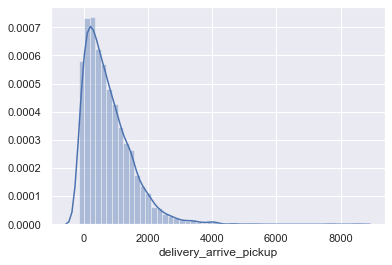

In [254]:
#looks like there are a few negative value here. Let's check the distribution.
sns.distplot(df['delivery_arrive_pickup'])
plt.show()

In [255]:
df['waittime_at_pickup'] = df['when_the_Jumpman_left_pickup'] - df['when_the_Jumpman_arrived_at_pickup']
df['waittime_at_pickup'] = df['waittime_at_pickup']/np.timedelta64(1,'s')
print(df['waittime_at_pickup'])

0               NaN
1       1340.970322
2       1311.191405
3        740.136239
4        636.698071
           ...     
5978     738.836498
5979     595.110131
5980    1339.965728
5981    1007.947938
5982    1539.611364
Name: waittime_at_pickup, Length: 5983, dtype: float64


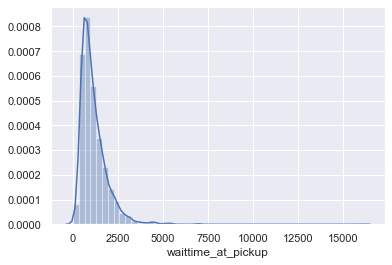

In [256]:
sns.distplot(df['waittime_at_pickup'])
plt.show()

In [257]:
df['pickup_to_dropoff'] = df['when_the_Jumpman_arrived_at_dropoff'] - df['when_the_Jumpman_left_pickup']
df['pickup_to_dropoff'] = df['pickup_to_dropoff']/np.timedelta64(1,'s')
print(df['pickup_to_dropoff'])

0               NaN
1        659.857620
2        330.650152
3        960.194245
4       1387.750301
           ...     
5978    1010.992265
5979     386.605768
5980    1472.883935
5981     679.488946
5982    1552.290370
Name: pickup_to_dropoff, Length: 5983, dtype: float64


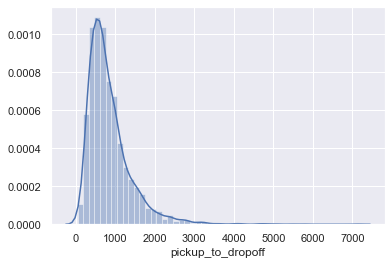

In [258]:
sns.distplot(df['pickup_to_dropoff'])
plt.show()

In [267]:
# Let's take a look into the negative time interval in 'delivery_arrive_pickup' column.
neg = df['delivery_arrive_pickup'] < 0
    
df_neg = df.iloc[neg.values]
df_neg.head(10)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,delivery_arrive_pickup,waittime_at_pickup,pickup_to_dropoff
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,...,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.984810,2014-10-28 22:04:40.634962,-153.860989,1311.191405,330.650152
6,1334106,101347,124897,bicycle,The Loop,Sushi,Spicy Tuna Roll,1.0,Classic Roll & Hand Roll,00:04:49.413655,...,-73.986093,40.738368,-74.000105,2014-10-10 21:08:55.489926,2014-10-10 21:07:15.966292,2014-10-10 21:29:24.500711,2014-10-10 21:40:01.697548,-99.523634,1328.534419,637.196837
7,1311619,59161,79847,bicycle,Insomnia Cookies,Bakery,Chocolate Chunk,2.0,Cookies and Brownies,NaN,...,-74.000589,40.734703,-73.998206,2014-10-06 23:20:09.312584,2014-10-06 23:17:35.666950,2014-10-07 00:03:24.389592,2014-10-07 00:09:16.559521,-153.645634,2748.722642,352.169929
18,1324131,334758,90681,bicycle,Melt Shop,American,Cheesy Tots,1.0,Sides & Snacks,00:08:50.378398,...,-73.990742,40.763320,-73.993809,2014-10-09 15:32:43.974085,2014-10-09 15:32:18.537789,2014-10-09 15:51:08.623130,2014-10-09 16:03:53.278308,-25.436296,1130.085341,764.655178
56,1365392,41415,142301,bicycle,Clinton St. Baking Co. & Restaurant,NaN,Pancakes with Warm Maple Butter,1.0,Brunch,00:03:53.585842,...,-73.983994,40.743140,-73.996904,2014-10-15 09:34:44.574598,2014-10-15 09:34:17.550238,2014-10-15 09:54:09.214336,2014-10-15 10:07:50.730760,-27.024360,1191.664098,821.516424
63,1275526,303211,31859,bicycle,Hale & Hearty,Salad,Dirty Chips Lightly Salted,1.0,Desserts and Chips,NaN,...,-73.978472,40.793834,-73.941521,2014-10-01 20:34:44.468907,2014-10-01 20:34:30.382857,2014-10-01 20:43:52.121288,2014-10-01 21:00:33.384112,-14.086050,561.738431,1001.262824
73,1390257,198677,28765,bicycle,Lure Fishbar,Seafood,Mascarpone Polenta,1.0,Dinner Sides,00:03:26.990336,...,-73.998402,40.767725,-73.991564,2014-10-18 17:11:50.763837,2014-10-18 17:10:11.590955,2014-10-18 17:37:31.916356,2014-10-18 18:13:40.943173,-99.172882,1640.325401,2169.026817
83,1287603,55334,39202,bicycle,Sushi of Gari Tribeca,Japanese,Tuna Of Gari,2.0,From Sushi Bar,00:06:17.649828,...,-74.008251,40.723324,-73.991335,2014-10-03 18:15:11.692070,2014-10-03 18:14:16.870660,2014-10-03 18:40:07.114173,2014-10-03 18:56:18.068795,-54.821410,1550.243513,970.954622
89,1355600,376824,102647,bicycle,Momofuku Milk Bar (archived),Dessert,B'day Cake Truffles,1.0,Cake Truffles,NaN,...,-74.002061,40.707330,-74.004444,2014-10-13 15:59:30.855203,2014-10-13 15:58:33.845604,2014-10-13 16:21:25.350875,2014-10-13 16:34:46.561388,-57.009599,1371.505271,801.210513
90,1458715,173667,177847,bicycle,Whole Foods Market,Grocery Store,NaN,NaN,NaN,NaN,...,-73.991829,40.718761,-74.002536,2014-10-26 14:45:26.373464,2014-10-26 14:42:49.174540,2014-10-26 15:09:39.900963,2014-10-26 15:25:00.647493,-157.198924,1610.726423,920.746530


In [274]:
mean1 = df['delivery_arrive_pickup'].mean()

ill_index1 = df[df['delivery_arrive_pickup'] < 0].index 
df.loc[ill_index1, 'delivery_arrive_pickup'] = mean1


### Integrity Issue 3: Negative time interval values in the delivery process. ###
<p> For further analysis, I replaced the negative values with column mean.</p>

In [275]:
# Translate the how_long_it_took_to_order column into seconds . 

def convert_timestamp_to_seconds(timestamp_value):
    if type(timestamp_value) != str:
        return timestamp_value
    import datetime
    x = time.strptime(str(timestamp_value), '%H:%M:%S.%f')
    seconds = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    return seconds

df['how_long_it_took_to_order'] = df['how_long_it_took_to_order'].apply(convert_timestamp_to_seconds)
df.head()



,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,delivery_arrive_pickup,waittime_at_pickup,pickup_to_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,1198.0,...,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaT,NaT,2014-10-26 14:52:06.313088,NaN,NaN,NaN
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,1509.0,...,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.654910,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,1623.466021,1340.970322,659.857620
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,404.0,...,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.984810,2014-10-28 22:04:40.634962,762.552908,1311.191405,330.650152
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,...,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,606.227683,740.136239,960.194245
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),225.0,...,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,444.251718,636.698071,1387.750301


In [289]:
mean2 = df['how_long_it_took_to_order'].mean()
mean2

df['how_long_it_took_to_order']=df['how_long_it_took_to_order'].fillna(468.66260697827516)


In [290]:
# fill in all the time interval null values with column mean
mean3 =  df['delivery_arrive_pickup'].mean()
mean3 
# 841.2012101584426
df['delivery_arrive_pickup']=df['delivery_arrive_pickup'].fillna(841.2012101584426)

mean4 = df['waittime_at_pickup'].mean()
mean4 
# 1134.965448500644
df['waittime_at_pickup'] = df['waittime_at_pickup'].fillna(1134.965448500644)

mean5 =df['pickup_to_dropoff'].mean()
mean5
# 848.1155378374748
df['pickup_to_dropoff'] = df['pickup_to_dropoff'].fillna(848.1155378374748)


### Integrity issue 4: Tranfer the time format of 'how_long_it_took_to_order' column and fill in all time interval null values with mean. ###
<p>Since the time interval numbers will be used in the next step analysis and we need to transfer the time interval format into seconds, I will replace the null value with column mean.</p>

In [295]:
# export the cleaned data into csv file for tableau analysis
df.to_csv("dataset/jumpman23.csv")

## Part II. Market Growth Analysis ##

The goal is to come up a plan to grow the market by 20% in two months. To define the metrics measuring 'market', I will set the KPI as delivery order number, the secondary metrics are customer number, jumpman number, pickup_place(the restaurants) number and daily order number. The strategy here is to figure out what might impact the KPIs and find out if there are specific features of the higher value customers, jumpmen, restaurants and so on.

**The goal of the KPI of delivery order number**

In [326]:
df['delivery_id'].nunique()
#5214

print(5214*1.2)

6256.8


**Goal breakdown:**
- delivery order = customer number * order made per customer 
- delivery order = listed restaurant number * order per restaurant

By acquiring more customers, signed up with more restaurants, and increase the order number per customer or per restaurants will help increase the overall orders.
<p> See attached Tableau analysis - Market Growth Model for further information.</p>

**What may impact on the KPIs?**

- Assumption 1: Will customer waiting time affect customer making orders or order quantity?

In [296]:
# add a columns called overall processing time
df['over_all_time'] = df['delivery_arrive_pickup'] + df['waittime_at_pickup'] + df['pickup_to_dropoff']+df['how_long_it_took_to_order']
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,delivery_arrive_pickup,waittime_at_pickup,pickup_to_dropoff,over_all_time
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,1198.000000,...,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaT,NaT,2014-10-26 14:52:06.313088,841.201210,1134.965449,848.115538,4022.282196
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,1509.000000,...,40.719722,-73.991858,2014-10-16 21:58:58.654910,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,1623.466021,1340.970322,659.857620,5133.293963
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,404.000000,...,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.984810,2014-10-28 22:04:40.634962,762.552908,1311.191405,330.650152,2808.394465
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,468.662607,...,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,606.227683,740.136239,960.194245,2775.220774
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),225.000000,...,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,444.251718,636.698071,1387.750301,2693.700090


In [322]:
# check if customer waiting time will affect their order number and order item quantity
df_customer_pivot = pd.pivot_table(df, values = ['delivery_id', 'item_quantity','delivery_arrive_pickup','waittime_at_pickup','pickup_to_dropoff','over_all_time'], index = 'customer_id' , aggfunc ={'delivery_id':'count','item_quantity':'sum','delivery_arrive_pickup':'mean', 'waittime_at_pickup':'mean','pickup_to_dropoff':'mean','over_all_time':'mean'})
df_customer_pivot = df_customer.rename(columns={'delivery_id':'orders'})
df_customer=df_customer_pivot[['orders', 'item_quantity','delivery_arrive_pickup','waittime_at_pickup','pickup_to_dropoff','over_all_time']].copy()
df_customer.head()

,orders,item_quantity,delivery_arrive_pickup,waittime_at_pickup,pickup_to_dropoff,over_all_time
customer_id,,,,,,
242,1,1.0,335.829314,1314.276426,767.884148,2714.989888
641,1,1.0,992.008135,4056.112048,1134.184531,6650.967321
1311,2,2.0,29.473825,1416.774202,1455.778944,3271.858275
1517,1,0.0,841.201210,1134.965449,848.115538,3940.282196
2533,2,2.0,841.201210,1134.965449,848.115538,3292.944803


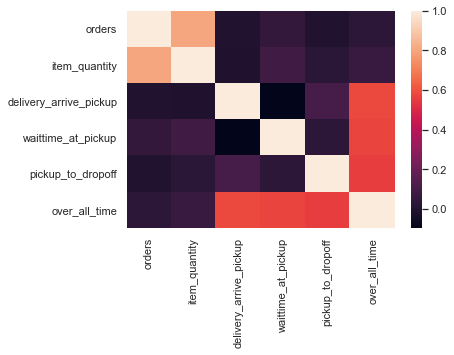

In [323]:
p1 = sns.heatmap(df_customer.corr())

In [324]:
corr = df_customer.corr(method = 'pearson')
corr

,orders,item_quantity,delivery_arrive_pickup,waittime_at_pickup,pickup_to_dropoff,over_all_time
orders,1.000000,0.805236,0.000514,0.050297,-0.002546,0.033874
item_quantity,0.805236,1.000000,-0.006474,0.087830,0.025974,0.065754
delivery_arrive_pickup,0.000514,-0.006474,1.000000,-0.097728,0.106490,0.583075
waittime_at_pickup,0.050297,0.087830,-0.097728,1.000000,0.031767,0.573323
pickup_to_dropoff,-0.002546,0.025974,0.106490,0.031767,1.000000,0.554821
over_all_time,0.033874,0.065754,0.583075,0.573323,0.554821,1.000000


**From the correlation above we do not see clear correlation between customer waiting time and order number or quantity. It could because of the size of data volumn, but so far we will consider the shipping time will not affect customer making orders.**


 - Assumption 2: Will find out the who are the biggest customers help us acquire high value customers?
 <p>See attached Tableau Analysis - Customer Map for further information.</p>

- Assumption 3: Will find out the who are the biggest restaurant seller help us signing up with popular restanrants?
<p>See attached Tableau Analysis - Restaurant Map for further information.</p>

- Assumption 4: Is there any underlying problem in shipping that can improve our shipping efficiency?
<p>See attached Tableau Analysis - shipping performance for further information.</p>